In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the cleaned data
data = pd.read_csv('../data/cleaned_data_playlist.csv')

# Separate features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Initialize models
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
svm = SVC()

# Evaluate models using cross-validation
logistic_scores = cross_val_score(logistic_regression, X_train, y_train, cv=5, scoring='accuracy')
random_forest_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')
svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

# Print mean accuracy for each model
print(f"Logistic Regression Accuracy: {logistic_scores.mean():.4f}")
print(f"Random Forest Accuracy: {random_forest_scores.mean():.4f}")
print(f"SVM Accuracy: {svm_scores.mean():.4f}")


Logistic Regression Accuracy: 0.7967
Random Forest Accuracy: 0.7950
SVM Accuracy: 0.7350


In [7]:
# Assuming Random Forest performed the best based on the example, we'll use it
best_model = RandomForestClassifier()

# Train the best model on the full training data
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8267


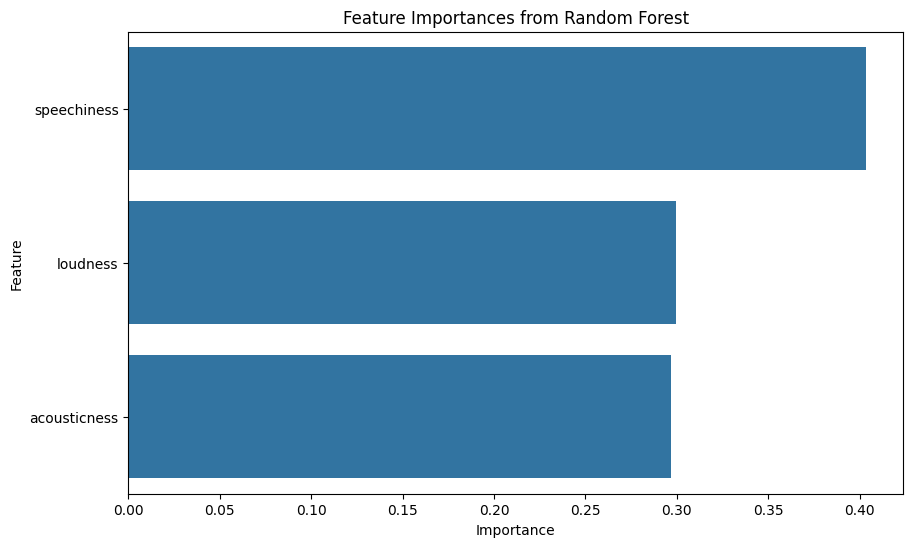

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Get feature importances for Random Forest
feature_importances_rf = best_model.feature_importances_
importance_df_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

# Plot feature importances for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf)
plt.title('Feature Importances from Random Forest')
plt.show()

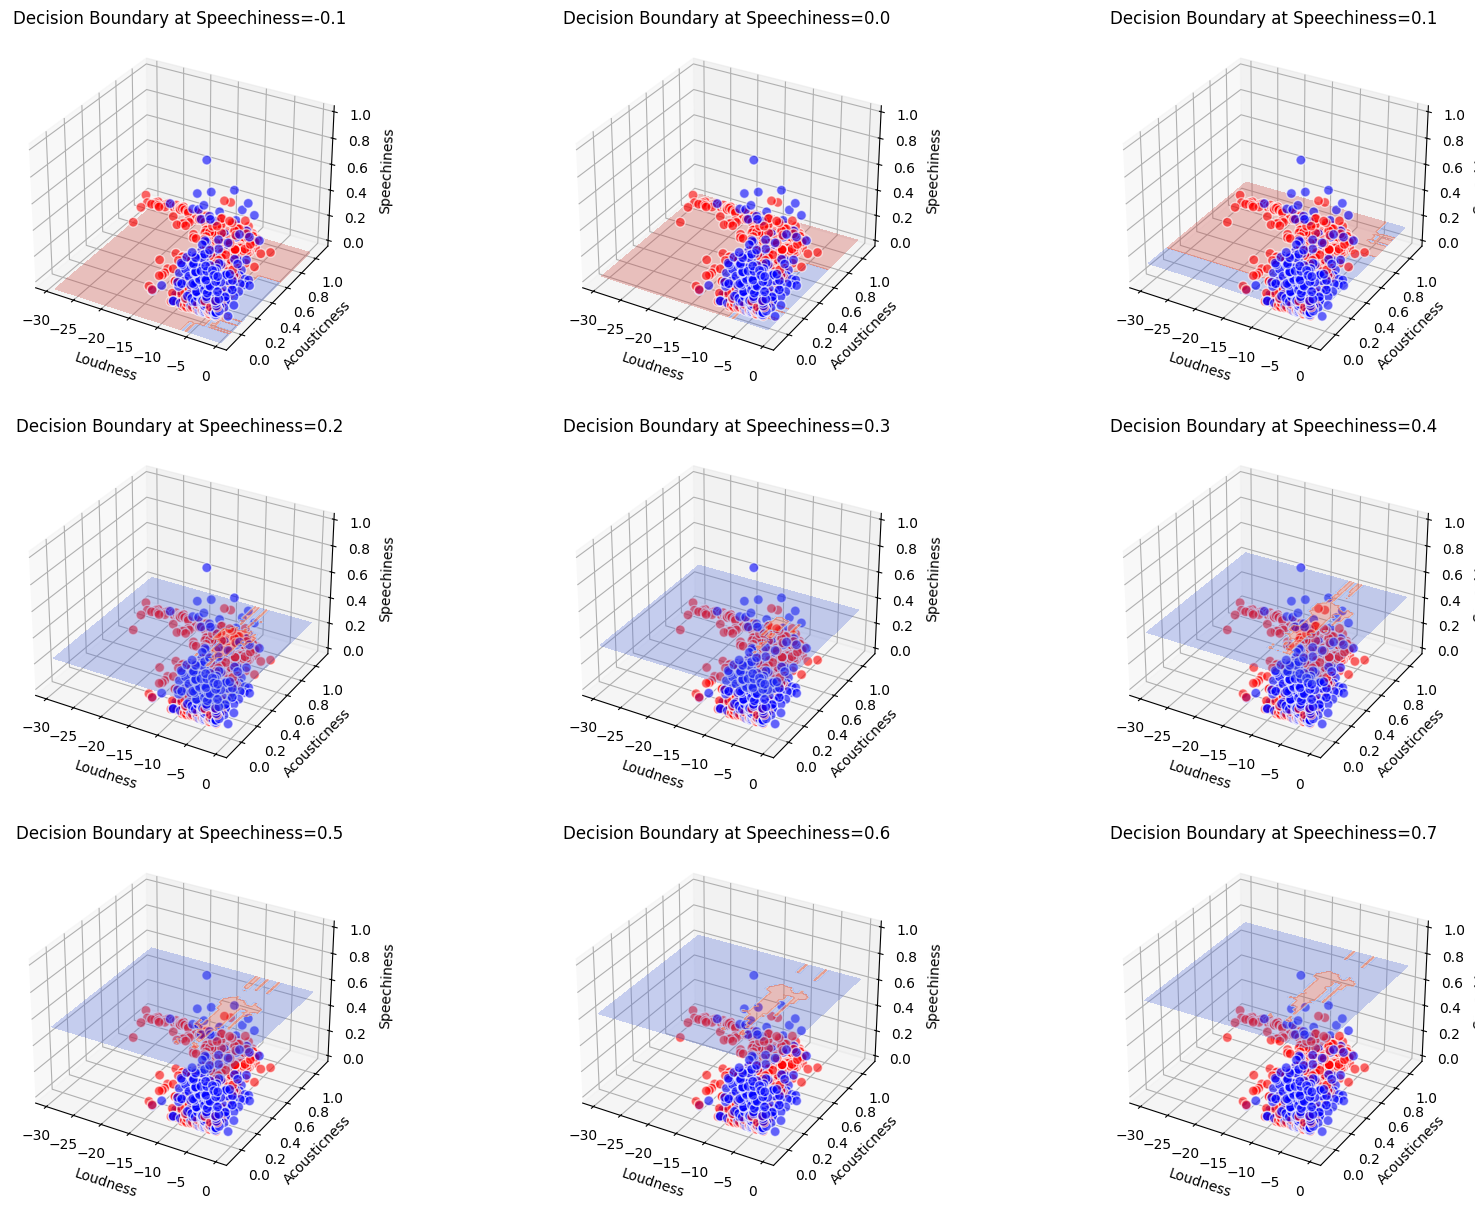

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the range for the grid
x_min, x_max = X_train['loudness'].min() - 1, X_train['loudness'].max() + 1
y_min, y_max = X_train['acousticness'].min() - 0.1, X_train['acousticness'].max() + 0.1
z_min, z_max = X_train['speechiness'].min() - 0.1, X_train['speechiness'].max() + 0.1

# Create a mesh grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.5),
                     np.arange(y_min, y_max, 0.01))

# Predict on the grid for different fixed values of z
fig = plt.figure(figsize=(20, 15))

for i, zz in enumerate(np.arange(z_min, z_max, 0.1)):
    ax = fig.add_subplot(3, 3, i+1, projection='3d')
    grid_points = np.c_[xx.ravel(), yy.ravel(), np.full(xx.ravel().shape, zz)]
    grid_points_df = pd.DataFrame(grid_points, columns=['loudness', 'acousticness', 'speechiness'])
    grid_predictions = best_model.predict(grid_points_df)
    grid_predictions = grid_predictions.reshape(xx.shape)
    
    # Plot the data points
    colors = data['label'].apply(lambda x: 'r' if x == 1 else 'b')
    ax.scatter(data['loudness'], data['acousticness'], data['speechiness'], c=colors, alpha=0.6, edgecolors='w', s=50)
    
    # Plot the decision boundary as a contour plot
    ax.contourf(xx, yy, grid_predictions, alpha=0.3, cmap='coolwarm', offset=zz)
    
    # Labels and title
    ax.set_xlabel('Loudness')
    ax.set_ylabel('Acousticness')
    ax.set_zlabel('Speechiness')
    ax.set_title(f'Decision Boundary at Speechiness={zz:.1f}')

plt.show()

In [18]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        54
           1       0.88      0.84      0.86        96

    accuracy                           0.83       150
   macro avg       0.81      0.82      0.81       150
weighted avg       0.83      0.83      0.83       150



In [19]:
data['speechiness_loudness'] = data['speechiness'] * data['loudness']
data['speechiness_acousticness'] = data['speechiness'] * data['acousticness']

# Separate features and target variable
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Feature importances
importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)

              precision    recall  f1-score   support

           0       0.75      0.78      0.76        54
           1       0.87      0.85      0.86        96

    accuracy                           0.83       150
   macro avg       0.81      0.82      0.81       150
weighted avg       0.83      0.83      0.83       150

                    Feature  Importance
2               speechiness    0.296386
0                  loudness    0.226191
1              acousticness    0.193202
3      speechiness_loudness    0.152127
4  speechiness_acousticness    0.132094


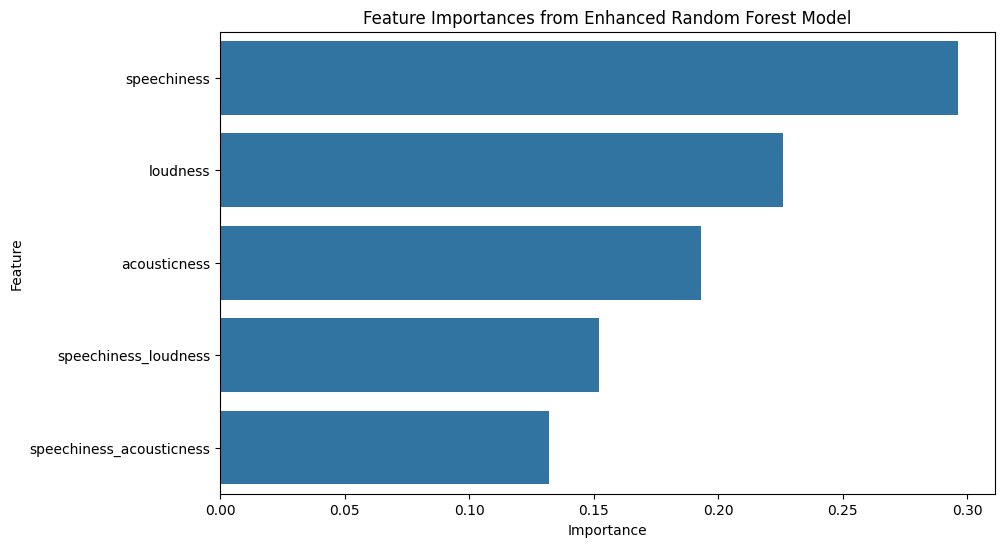

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importances for the enhanced model
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from Enhanced Random Forest Model')
plt.show()